In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz, buttord
import soundfile as sf

a.	Load the audio2.wav files. Plot the raw signal and analyze them using FT.

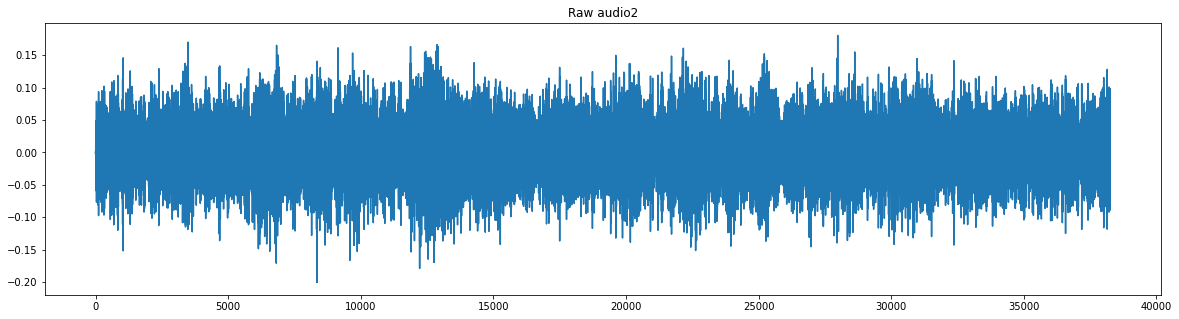

In [2]:
data,samp= sf.read("audio2.wav")
plt.figure(figsize=(20,5))
plt.title("Raw audio2")
plt.plot(np.arange(len(data)),data)

c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


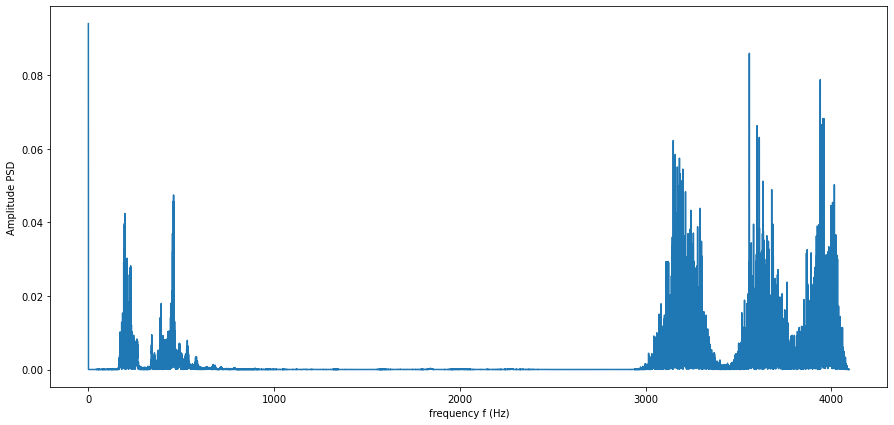

In [3]:
def TransformData(data_seg):
    N = len(data_seg)
    X = np.fft.fft(data_seg)
    PSD = X*np.conj(X)/N
    f = np.arange(0,samp/2,samp/N)

    plt.figure(figsize = (15,7))
    plt.plot(f,PSD[:int(N/2)+1])
    plt.xlabel("frequency f (Hz)")
    plt.ylabel("Amplitude PSD")
    plt.show()

PSD = TransformData(data)

b.	Design digital filters to remove noise in these audio files.

In [4]:
# From a. choose:
fc = 900
fs = samp
fp = 2900
Ap = 1
As = 60

In [5]:
order,_ = buttord(fc,fp,Ap,As,fs = fs)
print(order)
b,a = butter(order,fc,fs = fs,btype="low")

5


c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


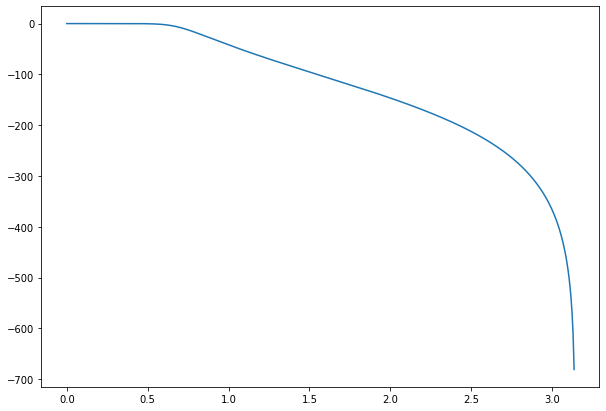

In [10]:
w,H = freqz(b,a)
plt.figure(figsize = (10,7))
plt.plot(w,20*np.log(H))

In [7]:
y = lfilter(b,a,data)

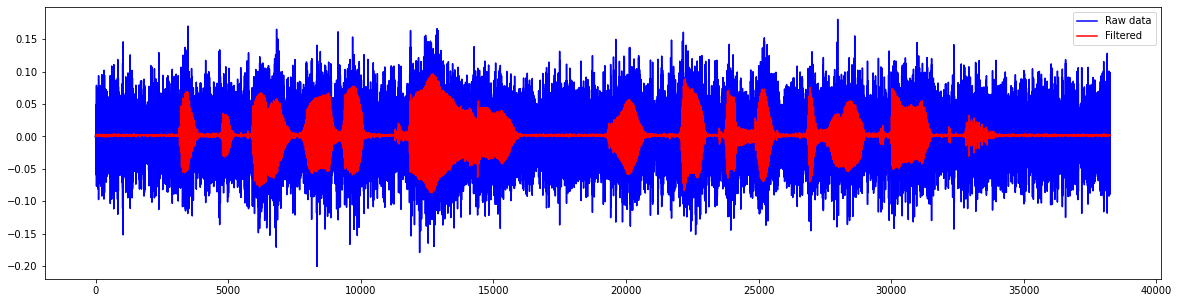

In [8]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(len(data)),data,"b",label = "Raw data")
plt.plot(np.arange(len(data)),y,"r",label = "Filtered")
plt.legend()

In [9]:
sf.write("audio2_filtered.wav",y,samp)